# Plot Examples

This notebook plots examples of cross-identifications by an expert-trained random forest classifier.

In [1]:
import aplpy
import astropy.io
import h5py
import matplotlib.cm
import matplotlib.pyplot as plt
import numpy

from pipeline import compact_test

%matplotlib inline

In [2]:
with h5py.File('/Users/alger/data/Crowdastro/crowdastro-swire.h5', 'r') as f:
    swire_coords = astropy.coordinates.SkyCoord(
        ra=f['/swire/cdfs/numeric'][:, 0],
        dec=f['/swire/cdfs/numeric'][:, 1],
        unit='deg')

In [3]:
crowdastrocat = astropy.io.ascii.read('/Users/alger/data/Crowdastro/one-table-to-rule-them-all.tbl')
compact = {r['Component Name (Franzen)']:compact_test(r) for r in crowdastrocat
           if r['Component Name (Franzen)']}

In [4]:
def nn_xid(ra, dec):
    c = astropy.coordinates.SkyCoord(ra=ra, dec=dec, unit='deg')
    sep = c.separation(swire_coords)
    return swire_coords[sep.argmin()]

In [5]:
cross_ids = astropy.io.ascii.read('/Users/alger/data/Crowdastro/predicted_cross_ids_table_12_10_17_cdfs.csv')

In [6]:
compact_ = numpy.array([compact[n] for n in cross_ids['ATLAS']])

In [7]:
# Get all cross-ids where Norris and RF disagree.
disagree_resolved = (cross_ids['Norris'] != cross_ids['RF(Norris / Resolved)']) & ~compact_

In [26]:
def plot(k):
    row = cross_ids[k]

    column_names = row.columns.keys()
    column_values = row.columns.values()
    # ATLAS, RA, Dec, CID, ZID, Norris, Norris RA, Norris Dec, RGZ, RGZ RA, RGZ Dec, RGZ RC, RGZ IRC,
    # then (classifier, RA, Dec).
    cid = row['CID']
    radio_path = '/Users/alger/data/RGZ/cdfs/2x2/{}_radio.fits'.format(cid)
    ir_path = '/Users/alger/data/RGZ/cdfs/2x2/{}_ir.fits'.format(cid)
    fig = aplpy.FITSFigure(ir_path)
    fig.show_grayscale(invert=True)
    fig.show_contour(astropy.io.fits.open(radio_path), colors='k')
    colours = matplotlib.cm.Set1.colors
    i = 0
    for classifier in ['Norris', 'RGZ'] + column_names[13::3]:
        if 'Compact' in classifier or 'All' in classifier:
            continue

        if 'CNN' in classifier:
            marker = '^'
        elif 'LR' in classifier:
            marker = 'o'
        elif 'RF' in classifier:
            marker = 'x'
        else:
            marker = 's'

        if 'Norris' in classifier:
            colour = 'red'
        else:
            colour = 'orange'

        ra = row['{} RA'.format(classifier)]
        try:
            dec = row['{}Dec'.format(classifier)]
        except KeyError:
            dec = row['{} Dec'.format(classifier)]

        fc = 'None'
        ec = colour
        if marker == 'x':
            fc = ec

        fig.show_markers([ra], [dec], label=classifier.replace(' / Resolved', ''),
                         edgecolor=ec, facecolor=fc, marker=marker, s=400, linewidth=3, zorder=10)

        i += 1

    sc = nn_xid(row['RA'], row['Dec'])
    fig.show_markers([sc.ra.deg], [sc.dec.deg], label='NN', marker='+', c='pink', s=400, zorder=10)
    fig.tick_labels.set_font(size='xx-large', weight='medium', \
                             stretch='normal', family='sans-serif', \
                             style='normal', variant='normal')
    fig.axis_labels.set_font(size='xx-large', weight='medium', \
                             stretch='normal', family='sans-serif', \
                             style='normal', variant='normal')

    plt.legend(markerscale=1, loc='best', fontsize='xx-large', labelspacing=1)

INFO: Auto-setting vmin to -6.544e-03 [aplpy.core]
INFO: Auto-setting vmax to  2.716e-01 [aplpy.core]


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
/usr/local/lib/python3.6/site-packages/aplpy/wcs_util.py:476: UserWarning: Warning: converting a masked element to nan.
  x_pix, y_pix = wcs.wcs_world2pix(np.array(x_world), np.array(y_world), 1)


INFO: Auto-setting vmin to -4.406e-02 [aplpy.core]
INFO: Auto-setting vmax to  6.930e-01 [aplpy.core]
INFO: Auto-setting vmin to -3.261e-02 [aplpy.core]
INFO: Auto-setting vmax to  5.727e-01 [aplpy.core]
INFO: Auto-setting vmin to -2.547e-02 [aplpy.core]
INFO: Auto-setting vmax to  5.065e-01 [aplpy.core]
INFO: Auto-setting vmin to -7.708e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.088e+00 [aplpy.core]
INFO: Auto-setting vmin to -8.826e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.210e+00 [aplpy.core]
INFO: Auto-setting vmin to -1.469e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.776e-01 [aplpy.core]
INFO: Auto-setting vmin to -2.227e-02 [aplpy.core]
INFO: Auto-setting vmax to  4.686e-01 [aplpy.core]
INFO: Auto-setting vmin to -1.324e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.795e-01 [aplpy.core]
INFO: Auto-setting vmin to -1.426e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.750e-01 [aplpy.core]
INFO: Auto-setting vmin to -1.034e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.6

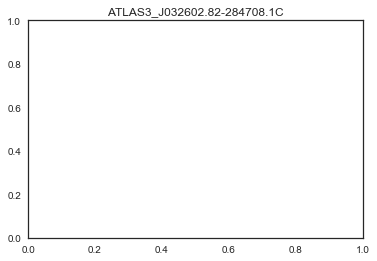

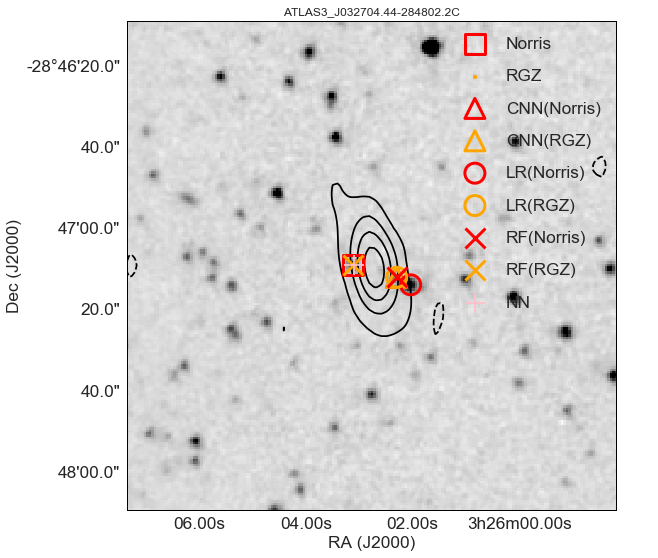

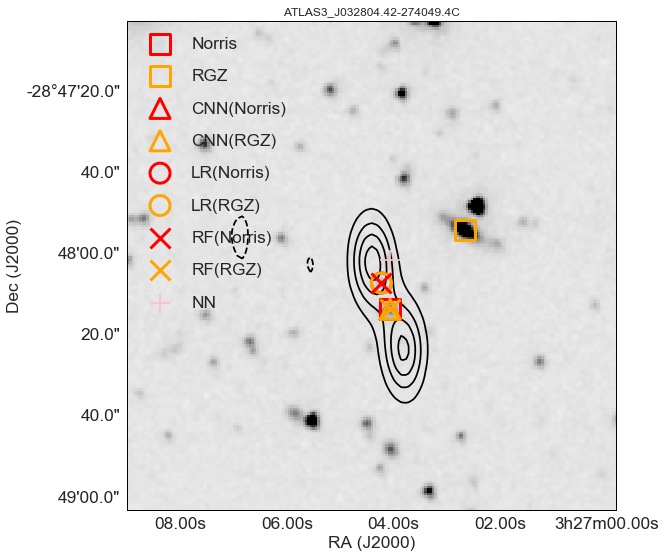

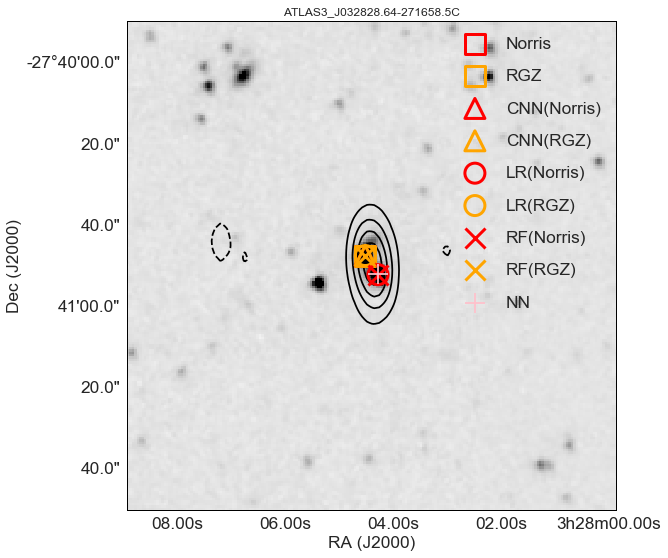

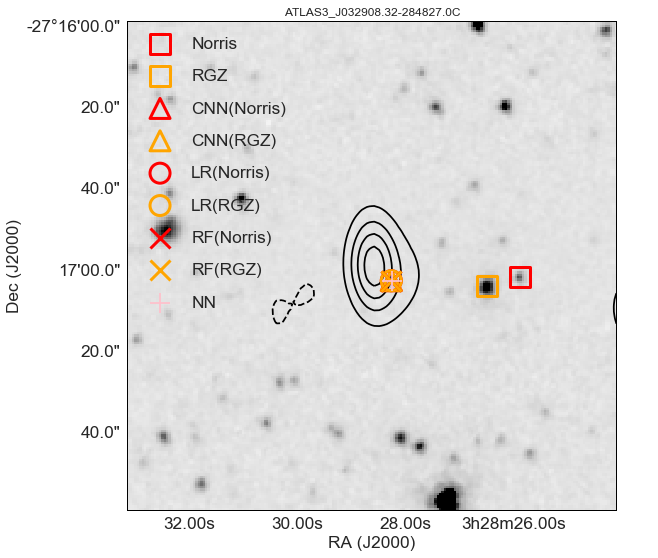

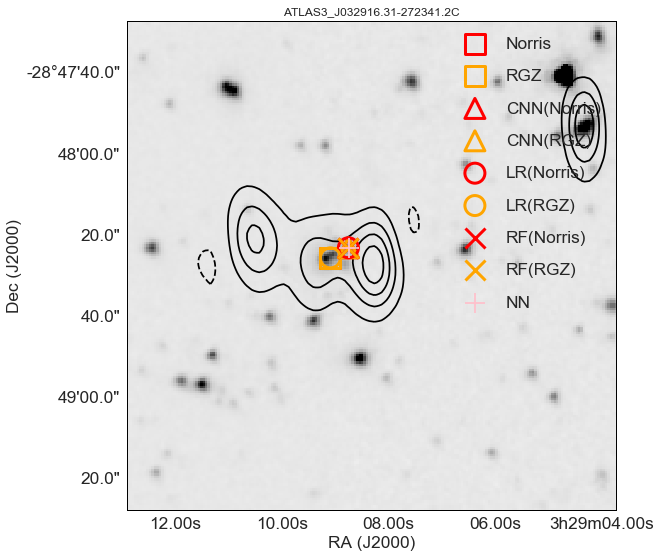

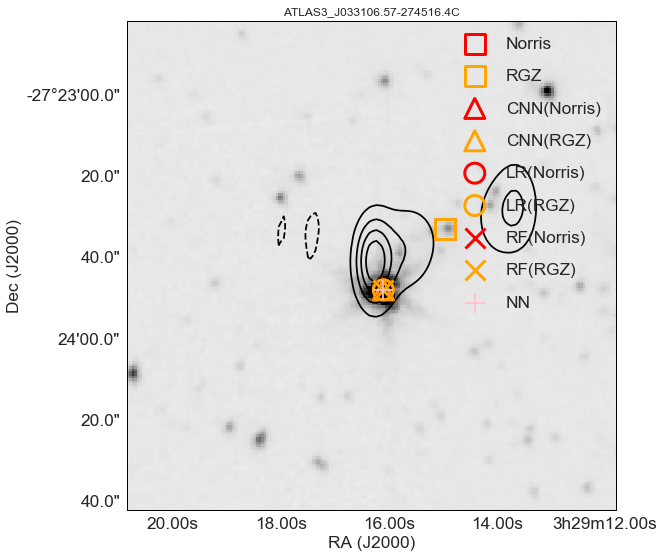

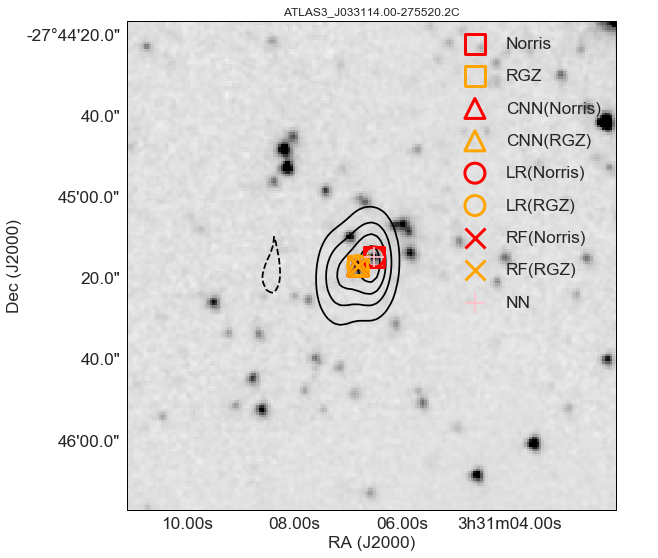

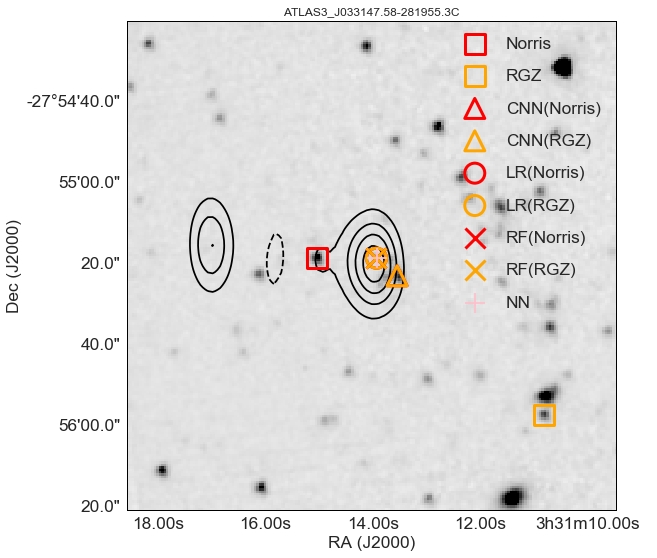

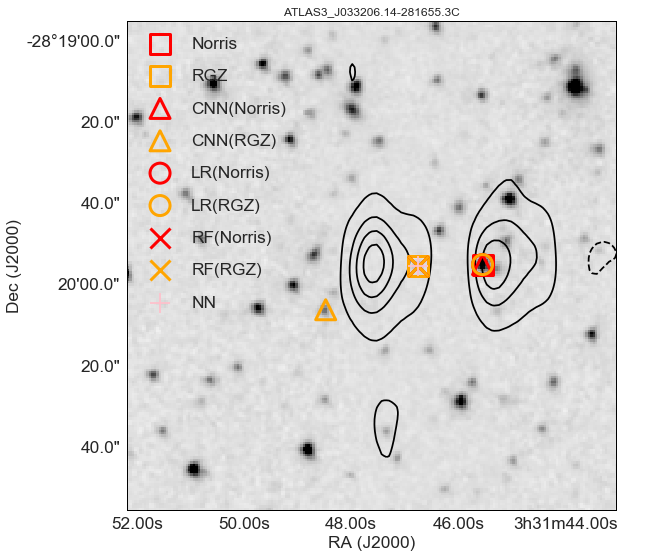

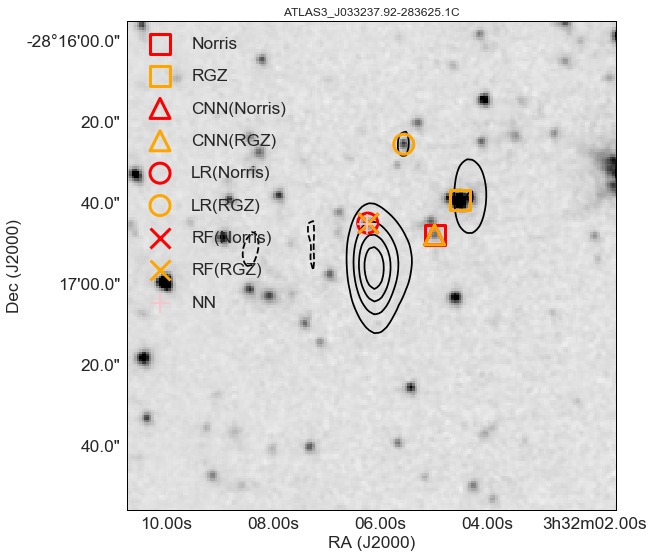

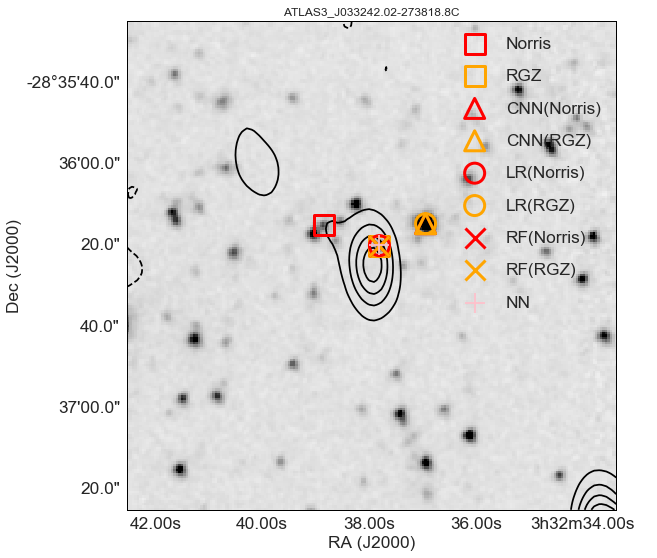

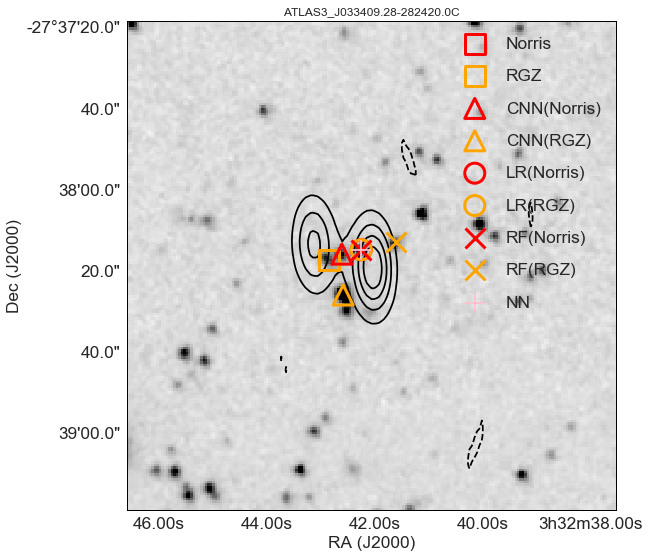

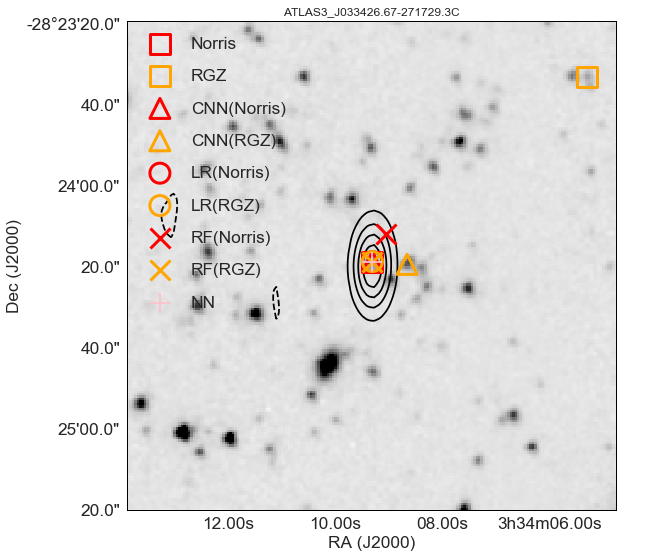

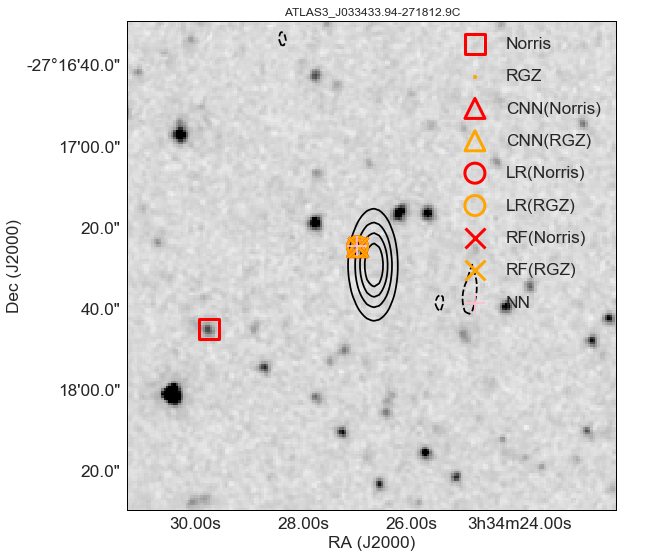

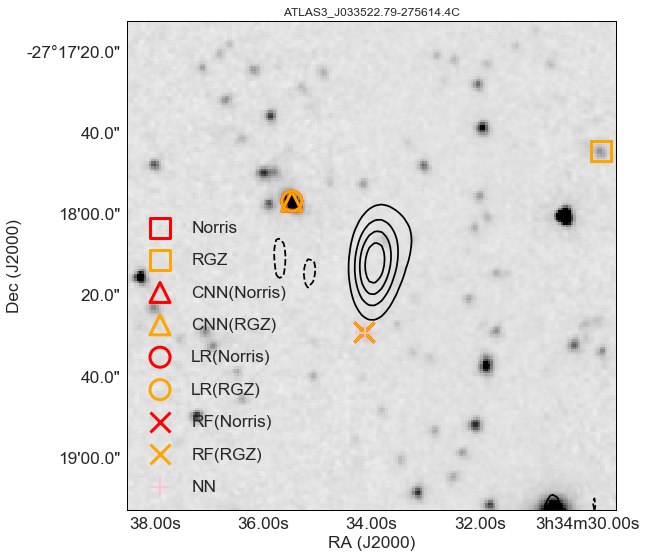

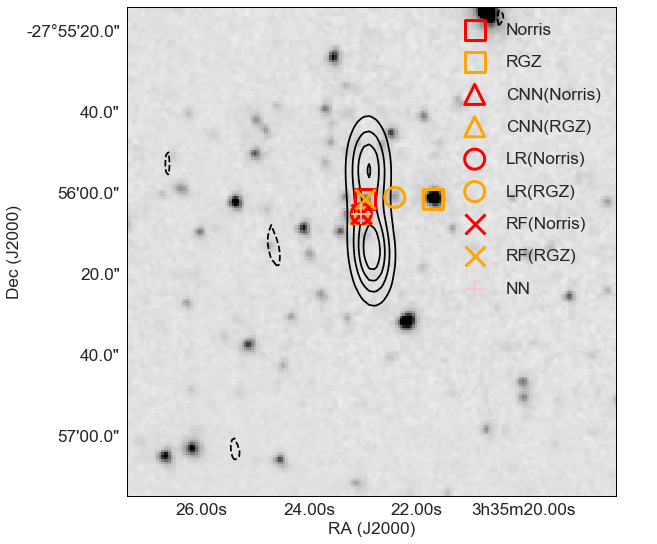

In [27]:
for i, k in enumerate(disagree_resolved.nonzero()[0]):
    plt.title(cross_ids[k]['ATLAS'])
    plot(k)
    plt.savefig('/Users/alger/repos/crowdastro-projects/ATLAS-CDFS/images/example_{}_{}.pdf'.format(i, k))
#     plt.clf()

In [25]:
len(disagree_resolved.nonzero()[0])

16